## Kaggle大赛第一步
前段时间学完了Udacity的深度学习基石课程，内容挺好，但是就是缺乏实战，于是找到了fast.ai的课程，准备进入kaggle大赛来检验下自己的学习成果，这是kaggle大赛第一步：入门。

下面是一些TODO LIST

1. 注册Kaggle的账号
2. 选择[dogs-vs-cats-redux-kernels-edition](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition)项目，选择同意数据协议（为了后面通过命令行下载数据用）
3. [aws环境搭建](http://wiki.fast.ai/index.php/AWS_install)
4. 数据目录准备

## download data
第一步，我们要去下载数据，地址：链接: https://pan.baidu.com/s/1kUAnr3T 密码: pdxw

In [1]:
# frequent file shortcuts
import os, sys
current_directory = os.getcwd()
LESSON_HOME_DIR = current_directory
DATA_HOME_DIR = os.path.join(current_directory,"../data/redux")
print(DATA_HOME_DIR)
print(LESSON_HOME_DIR)

/home/carnd/fast.ai/lesson1/../data/redux
/home/carnd/fast.ai/lesson1


In [2]:
## 创建目录
![ ! -d $DATA_HOME_DIR ] && mkdir -pv $DATA_HOME_DIR

In [3]:
#Create directories
%cd $DATA_HOME_DIR

/home/carnd/fast.ai/data/redux


In [ ]:
# 命令安装
# 参考文档：https://github.com/floydwch/kaggle-cli
# !pip install kaggle-cli

In [ ]:
# 配置kg
# 参考：http://wiki.fast.ai/index.php/Kaggle_CLI

## Organize data into folders
这一步是为了更好的组织我们的数据，结构如下：
```
data/
    train/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
    validation/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
```

In [5]:
#Create directories
%cd $DATA_HOME_DIR

/home/carnd/fast.ai/data/redux


In [8]:
# %mkdir -pv valid # 验证
# %mkdir results # 结果
# %mkdir -pv sample/train # 测试用目录
# %mkdir -pv sample/test
# %mkdir -pv sample/valid
# %mkdir -pv sample/results
# %mkdir -pv test/unknown # 测试

In [12]:
# !mkdir results
# !mkdir -pv sample/train
# !mkdir -pv sample/test
# !mkdir -pv sample/valid
# !mkdir -pv sample/results
# !mkdir -pv test/unknown # 测试

In [13]:
%cd $DATA_HOME_DIR/train

/home/carnd/fast.ai/data/redux/train


In [17]:
# 随机移动2k张照片到验证目录
import glob
import numpy as np
g = glob.glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(2000): os.rename(shuf[i], DATA_HOME_DIR+'/valid/' + shuf[i])

In [19]:
!ls $DATA_HOME_DIR/valid | wc -l

2000


In [20]:
# copy 200 张到 sample的train目录下
from shutil import copyfile
g = glob.glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(200): copyfile(shuf[i], DATA_HOME_DIR+'/sample/train/' + shuf[i])

In [21]:
!ls $DATA_HOME_DIR/sample/train/ | wc -l

200


In [23]:
g = glob.glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(50): copyfile(shuf[i], DATA_HOME_DIR+'/sample/valid/' + shuf[i])

## Rearrange image files into their respective directories
重新安排目录

In [24]:
#Divide cat/dog images into separate directories

%cd $DATA_HOME_DIR/sample/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $DATA_HOME_DIR/sample/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $DATA_HOME_DIR/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $DATA_HOME_DIR/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/home/carnd/fast.ai/data/redux/sample/train
/home/carnd/fast.ai/data/redux/sample/valid
/home/carnd/fast.ai/data/redux/valid
/home/carnd/fast.ai/data/redux/train


In [25]:
# Create single 'unknown' class for test set
%cd $DATA_HOME_DIR/test
%mv *.jpg unknown/

/home/carnd/fast.ai/data/redux/test


In [27]:
%cd $DATA_HOME_DIR
!tree -d

/home/carnd/fast.ai/data/redux
.
|-- results
|-- sample
|   |-- results
|   |-- test
|   |-- train
|   |   |-- cats
|   |   `-- dogs
|   `-- valid
|       |-- cats
|       `-- dogs
|-- test
|   `-- unknown
|-- train
|   |-- cats
|   `-- dogs
`-- valid
    |-- cats
    `-- dogs

18 directories


## 建立模型
此处我们没有直接采用fast.ai中的文件，而是决定自己来重新写下，为什么呢？一是为了让自己更好的理解，另一个则是使用Python版本的原因，此处我们使用3.5版本

第一步还是先直接饮用课程中写好的文件，直接运行，看有什么问题的

In [28]:
%cd $DATA_HOME_DIR

#Set path to sample/ path if desired
path = DATA_HOME_DIR + '/sample' #'/sample/'
test_path = DATA_HOME_DIR + '/test/' #We use all the test data
results_path=DATA_HOME_DIR + '/results/'
train_path=path + '/train/'
valid_path=path + '/valid/'
utils_path = current_directory + "/../utils"

/home/carnd/fast.ai/data/redux


In [33]:
#Allow relative imports to directories above lesson1/
sys.path.insert(1, os.path.join(utils_path))
#import modules
from utils import *
from vgg16 import Vgg16

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

上面遇到的问题，由于是3.5版本，需要修改
```
#import cPickle as pickle
import _pickle as pickle
```
conda install bcolz

## Finetuning and Training

In [38]:
!KERAS_BACKEND=theano
from keras import backend
backend.set_image_dim_ordering("th")

In [39]:
#import Vgg16 helper class
vgg = Vgg16()

In [40]:
#Set constants. You can experiment with no_of_epochs to improve the model
batch_size=64
no_of_epochs=3

In [41]:
#Finetune the model
batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size*2)
vgg.finetune(batches)

#Not sure if we set this for all fits
vgg.model.optimizer.lr = 0.01

Found 200 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


此处有问题，去看下get_batches里面到底做了什么呢？里面有个重要的函数`ImageDataGenerator`，让我们来看下到底是干什么了

In [63]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator( rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [66]:
![ ! -d $path/preview ] && mkdir $path/preview

In [67]:
flow = gen.flow_from_directory(train_path,target_size=(224,224),class_mode='categorical',shuffle=False,batch_size=1,
                                  save_to_dir=path+'/preview', save_prefix='dog-cat')

Found 200 images belonging to 2 classes.


In [71]:
print(flow.class_indices) # 类别字典
print(len(flow.classes),flow.classes) # 加载进来的标签
print(flow.image_shape) # 图片大小
print(flow.nb_class) # 类别个数
print(flow.nb_sample) # 总个数

{'dogs': 1, 'cats': 0}
200 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(3, 224, 224)
2
200


In [90]:
i = 0
flow.reset()
for batch in flow:
    i+=1
    print(type(batch),len(batch),type(batch[0]),batch[0].shape,batch[1].shape,batch[1]) # 具体的图像数据
    if i>8:
        break

<class 'tuple'> 2 <class 'numpy.ndarray'> (1, 3, 224, 224) (1, 2) [[ 1.  0.]]
<class 'tuple'> 2 <class 'numpy.ndarray'> (1, 3, 224, 224) (1, 2) [[ 1.  0.]]
<class 'tuple'> 2 <class 'numpy.ndarray'> (1, 3, 224, 224) (1, 2) [[ 1.  0.]]
<class 'tuple'> 2 <class 'numpy.ndarray'> (1, 3, 224, 224) (1, 2) [[ 1.  0.]]
<class 'tuple'> 2 <class 'numpy.ndarray'> (1, 3, 224, 224) (1, 2) [[ 1.  0.]]
<class 'tuple'> 2 <class 'numpy.ndarray'> (1, 3, 224, 224) (1, 2) [[ 1.  0.]]
<class 'tuple'> 2 <class 'numpy.ndarray'> (1, 3, 224, 224) (1, 2) [[ 1.  0.]]
<class 'tuple'> 2 <class 'numpy.ndarray'> (1, 3, 224, 224) (1, 2) [[ 1.  0.]]
<class 'tuple'> 2 <class 'numpy.ndarray'> (1, 3, 224, 224) (1, 2) [[ 1.  0.]]


In [101]:
from PIL import Image
from os import listdir
from os.path import isfile, join
prview_path = path+'/preview/'
imagefiles = [ f for f in listdir(prview_path) if isfile(join(prview_path,f)) ]

In [102]:
imagefiles

['dog-cat_6_6276.jpeg',
 'dog-cat_5_3055.jpeg',
 'dog-cat_2_8549.jpeg',
 'dog-cat_8_7959.jpeg',
 'dog-cat_0_5481.jpeg',
 'dog-cat_4_1367.jpeg',
 'dog-cat_1_7313.jpeg',
 'dog-cat_3_2517.jpeg',
 'dog-cat_7_1596.jpeg']

In [106]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(f, titles=None):
    plots([image.load_img(join(prview_path,i)) for i in f], titles=titles)

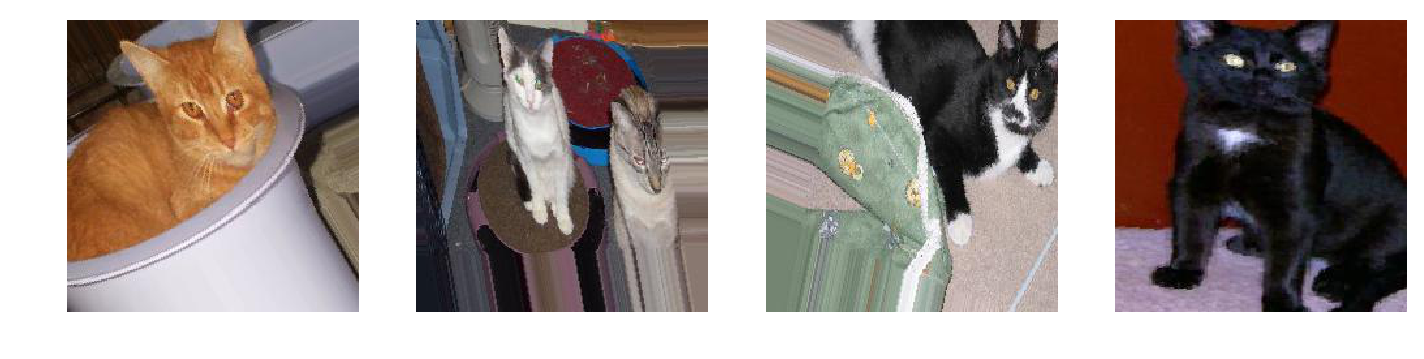

In [108]:
plots_idx(onlyfiles[:4])

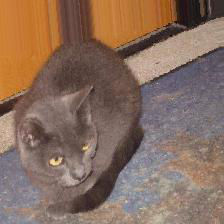

In [93]:
Image.open(path+'/preview/' + "dog-cat_0_5481.jpeg")

In [45]:
#Notice we are passing in the validation dataset to the fit() method
#For each epoch we test our model against the validation set
latest_weights_filename = None
for epoch in range(no_of_epochs):
    print("Running epoch: %d" %(epoch))
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'ft%d.h5' % epoch
    vgg.model.save_weights(results_path+latest_weights_filename)
print("Completed %s fit operations"%(no_of_epochs))

Running epoch: 0
Epoch 1/1


ValueError: Error when checking model input: expected lambda_input_3 to have shape (None, 3, 224, 224) but got array with shape (64, 224, 224, 3)

## 问题记录

1. 在aws环境搭建中，第一个问题是只支持3个地域，离中国太远了。慢，于是想个办法能不能用国内的？所以我换了Udacity-dl的ami，目前只能手动建立，做不到fast.ai中的命令行，暂时没有时间去研究那个脚本

2. 在mac上显示清晰问题
```
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
```